In [14]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./titanic_toy.csv")

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

We have some missing values in the age column as well as the fare column

In [7]:
xTrain, xTest, yTrain, yTest = train_test_split(df.drop(columns=['Survived']), df['Survived'], train_size=0.85, random_state=2)

In [10]:
meanAge = xTrain['Age'].mean()
medianAge = xTrain['Age'].median()
meanFare = xTrain['Fare'].mean()
medianFare = xTrain['Fare'].median()

In [11]:
xTrain['Age Mean'] = xTrain['Age'].fillna(meanAge)
xTrain['Age Median'] = xTrain['Age'].fillna(medianAge)
xTrain['Fare Mean'] = xTrain['Fare'].fillna(meanFare)
xTrain['Fare Median'] = xTrain['Fare'].fillna(medianFare)

In [13]:
print("Variance with no imputation on age: {}".format(xTrain['Age'].var()))
print("Variance with mean imputation on age: {}".format(xTrain['Age Mean'].var()))
print("Variance with median imputation on age: {}".format(xTrain['Age Median'].var()))

Variance with no imputation on age: 198.9084473101312
Variance with mean imputation on age: 158.12695348331857
Variance with median imputation on age: 158.4132731353912


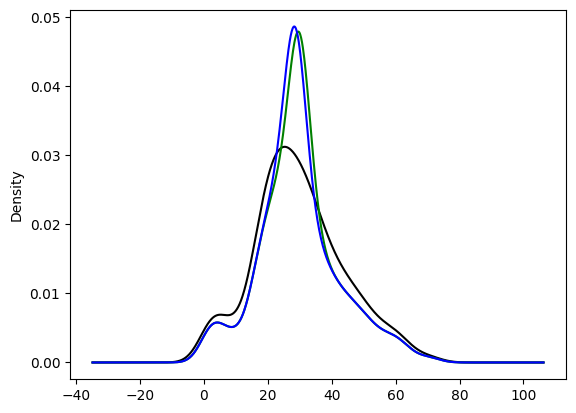

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

xTrain['Age'].plot(kind='kde', ax = ax, color = 'black')
xTrain['Age Mean'].plot(kind='kde', ax = ax, color = 'green')
xTrain['Age Median'].plot(kind='kde', ax = ax, color = 'blue')
plt.show()

We can see that after mean / median imputation, the distribution increases near the mean and median region

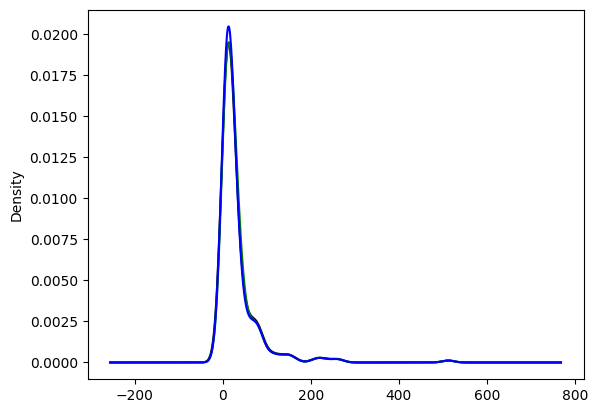

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

xTrain['Fare'].plot(kind='kde', ax = ax, color = 'black')
xTrain['Fare Mean'].plot(kind='kde', ax = ax, color = 'green')
xTrain['Fare Median'].plot(kind='kde', ax = ax, color = 'blue')
plt.show()

In [20]:
xTrain.cov()

,Age,Fare,Family,Age Mean,Age Median,Fare Mean,Fare Median
Age,198.908447,77.333217,-6.040124,198.908447,198.908447,72.707180,71.111694
Fare,77.333217,2667.188521,16.730625,61.029351,64.049915,2667.188521,2667.188521
Family,-6.040124,16.730625,2.719255,-4.801739,-4.773517,15.845406,15.958204
Age Mean,198.908447,61.029351,-4.801739,158.126953,158.126953,57.800284,56.531915
Age Median,198.908447,64.049915,-4.773517,158.126953,158.413273,60.661030,59.322573
Fare Mean,72.707180,2667.188521,15.845406,57.800284,60.661030,2526.067436,2526.067436
Fare Median,71.111694,2667.188521,15.958204,56.531915,59.322573,2526.067436,2542.769692


In [21]:
xTrain.corr()

,Age,Fare,Family,Age Mean,Age Median,Fare Mean,Fare Median
Age,1.000000,0.097817,-0.288318,1.000000,1.000000,0.095294,0.092832
Fare,0.097817,1.000000,0.193795,0.093545,0.098099,1.000000,1.000000
Family,-0.288318,0.193795,1.000000,-0.231564,-0.229995,0.191186,0.191914
Age Mean,1.000000,0.093545,-0.231564,1.000000,0.999096,0.091454,0.089153
Age Median,1.000000,0.098099,-0.229995,0.999096,1.000000,0.095894,0.093470
Fare Mean,0.095294,1.000000,0.191186,0.091454,0.095894,1.000000,0.996710
Fare Median,0.092832,1.000000,0.191914,0.089153,0.093470,0.996710,1.000000


Now lets see the situation of outliers

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


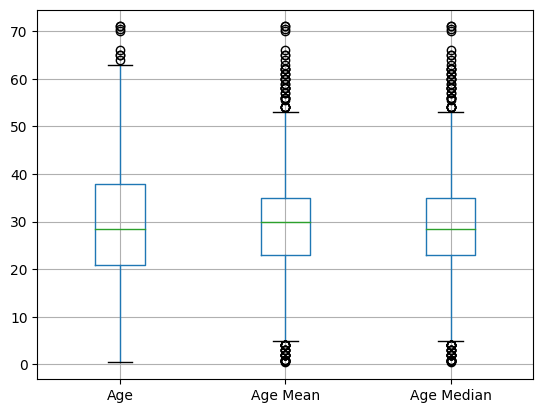

In [22]:
xTrain[['Age','Age Mean','Age Median']].boxplot()

as the missing data is filled with the median and mean values, we can see that the width of the inter quantile range is narrowed and also we can see appearances of outliers from both ends

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


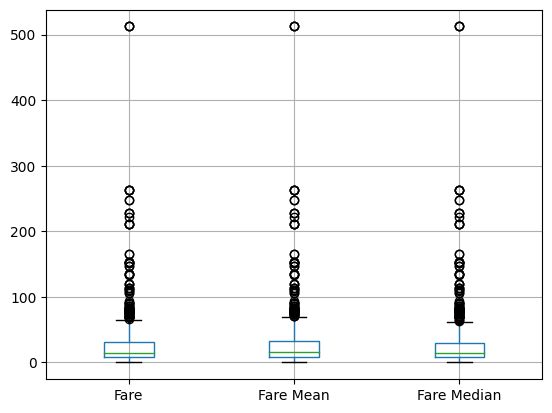

In [23]:
xTrain[['Fare', 'Fare Mean', 'Fare Median']].boxplot()

As the number of missing values is very less as compared to the whole data, that is 0.05%, we can see that there is not much change in the distribution of fare values before and after imputation